# **Question 2**


# **Basic important libraries**

In [6]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math 

# **Drive Mount**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd /content/drive/MyDrive/Machine Learning/Assignment 1/Q2 dataset

/content/drive/MyDrive/Machine Learning/Assignment 1/Q2 dataset


# **DATASET**

In [11]:
df = pd.read_csv("Real estate.csv" , index_col = 'No')
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [12]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [13]:
X = df.iloc[:,0:6]
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
# X = Xd.to_numpy()

In [14]:
Y = df.iloc[:,6:]
Y = Y.to_numpy()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 , random_state=157 )

In [16]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(331, 6) (83, 6) (331, 1) (83, 1)


# **Final Linear Regression Class**





In [17]:
class Linear_Regression:
    w0=None
    w1=None
    learning_rate=None
    itrs=None
    features=None
    train_set_size=None

    def __init__(self, learning_rate, itrs, features, training_points):
        self.w1 = np.zeros(features , dtype=float)
        self.w0 =  0.
        self.learning_rate=learning_rate
        self.itrs = itrs
        self.features = features
        self.training_points = training_points

    def compute_cost(self ,  X, Y, w1, w0): 
      m = X.shape[0]
      cost = 0.0
      for i in range(m):                                
          f_w_x = np.dot(X[i], w1) + w0          
          cost = cost + (f_w_x - Y[i])**2       
      cost = cost / (2*m)                        
      return cost
    

    def defferential_equation(self ,  X, Y , w1 , w0):
      m,n = X.shape           
      dj_dw1 = np.zeros((n,))
      dj_dw0 = 0.

      for i in range(m):                             
          err = (np.dot(X[i], w1) + w0) - Y[i]   
          for j in range(n):                         
              dj_dw1[j] = dj_dw1[j] + (err * X[i, j])   
          dj_dw0 = dj_dw0 + err                        
      dj_dw1 = dj_dw1 / m                                
      dj_dw0 = dj_dw0 / m                                    
      return dj_dw0, dj_dw1


    def gradient_descent(self , X, Y):     
      J_history = []
      w1_dash = copy.deepcopy(self.w1)  
      w0_dash = self.w0
      
      for i in range(self.itrs):

          dj_dw0 , dj_dw1 = self.defferential_equation(X, Y, w1_dash, w0_dash) 

          w1_dash = w1_dash - self.learning_rate * dj_dw1             
          w0_dash = w0_dash - self.learning_rate * dj_dw0              
        
          if i<100000:       
              J_history.append( self.compute_cost(X, Y, w1_dash, w0_dash))

          # if i% math.ceil(self.itrs / 10) == 0:
          #     print(f'Iteration {i}: Cost {J_history[-1]}'  )
          
      return w1_dash, w0_dash, J_history 
    
    def predict(self, x):
        return (np.matmul(x,self.w1)+self.w0)

In [18]:
def MSE(y_pred , y_test):
  m = y_pred.shape[0]
  error = np.zeros_like(y_pred)
  for i in range(m):
    error[i] = (y_pred[i] - y_test[i])**2
    # print(error[i])
  mse= np.sum(error)/(2*m)
  return mse;


def RMSE(y_pred , y_test):
  m = y_pred.shape[0]
  error = np.zeros_like(y_pred)
  for i in range(m):
    error[i] = (y_pred[i] - y_test[i])**2
    # print(error[i])
  mse= (np.sum(error)/m)**(1/2)
  return mse/4;

In [19]:
lg2 = Linear_Regression(0.1 , 100 , X_train.shape[1] ,X_train.shape[1])
a , b , c = lg2.gradient_descent(X_train,y_train)
print(a,b)

[ 1.59152964 -3.09567487 -6.30145285  2.99609777  2.12831608 -0.12455058] [38.21208711]


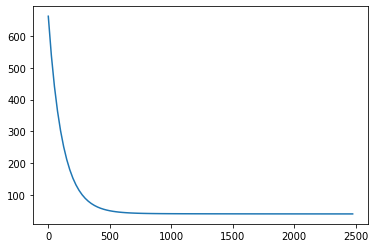

In [20]:
import matplotlib.pyplot as plt
x_coordinate = [ 25 * i for i in range(len(c)) ]
plt.plot(x_coordinate,c)
plt.show()

# **K-Fold**

In [21]:
def KFold(k , x , y , lr , itr):
    ERROR = []
    sz = len(x)//k
    for i in range(k):    
        # for every i test fold (eg k = 2) is chosen between 2i to 3i eg (index 2 to 3 ; 4 to 6 , 6 to 9) etc
        x_test = x[i*sz:(i+1)*sz] 
        y_test = y[i*sz :(i+1)*sz]
        
        if i>0:
            
            #if i == k-1 then test fold will be after 2i  so all the indexes from 0 to 2i are added to train set.(k = 2)
            if i==k-1:
                x_train=x[:i*sz]  
                y_train=y[:i*sz]
            
            # this else is to add the values that will occur after test fold
            else:
                p = x[(i-1)* sz : i * sz]
                n = x[(i+1)* sz:]
                x_train=np.concatenate((p,n))
                
                p = y[(i-1)* sz : i * sz]
                n = y[(i+1)* sz : ]
                y_train=np.concatenate((p,n))
        else:
            x_train = x[(i+1) * sz:]
            y_train = y[(i+1) * sz :]    
        # print(x_test)
        # print(y_test)
        # print(x_train)
        # print(y_train)

        lg = Linear_Regression(lr , itr , x.shape[1] ,y.shape[1])
        lg.gradient_descent(x,y)
        ERROR.append(RMSE(y_test,lg.predict(x_test)))
    
    print("mean RMSES of K-values",ERROR)
    print("K-value - :" , np.sum(ERROR)/k)

# **Part a**

The best results were obtained in k = 5  with - \\

*   K value = 20.234992480314737
*   RMSE Array of K folds = [21.63216775587185, 19.131558095239267, 20.65606705209407, 20.246494271923478, 19.508675226445007]

So optimal value of K should be 5 because it is giving us the minimum error and it is also doing maximum validation of the training set inside the k fold function.



In [22]:
print("K = 2")
KFold(2 , X_train ,y_train , 0.1 , 200)
print("K = 3")
KFold(3 , X_train ,y_train , 0.1 , 200)
print("K = 4")
KFold(4 ,X_train ,y_train , 0.1 , 200)
print("K = 5")
KFold(5 ,X_train ,y_train , 0.1 , 200)

K = 2
mean RMSES of K-values [10.242480057450575, 10.010320999605932]
K-value - : 10.126400528528254
K = 3
mean RMSES of K-values [10.455633540215185, 10.199877171720345, 9.7115714134316]
K-value - : 10.12236070845571
K = 4
mean RMSES of K-values [10.512255115908822, 10.00327233044633, 10.075549597670689, 9.974466640181697]
K-value - : 10.141385921051883
K = 5
mean RMSES of K-values [10.816083877935926, 9.565779047619634, 10.328033526047035, 10.123247135961739, 9.754337613222503]
K-value - : 10.117496240157369


# **Part b**

In [23]:
def KFold(k , x , y , lr , itr):
    ERROR1 = []
    ERROR2 = []
    sz = len(x)//k
    for i in range(k):    
        x_test = x[i*sz:(i+1)*sz] 
        y_test = y[i*sz :(i+1)*sz]        
        if i>0:
            if i==k-1:
                x_train=x[:i*sz]  
                y_train=y[:i*sz]
            else:
                p = x[(i-1)* sz : i * sz]
                n = x[(i+1)* sz:]
                x_train=np.concatenate((p,n))
                p = y[(i-1)* sz : i * sz]
                n = y[(i+1)* sz : ]
                y_train=np.concatenate((p,n))
        else:
            x_train = x[(i+1) * sz:]
            y_train = y[(i+1) * sz :]    
        lg = Linear_Regression(lr , itr , x.shape[1] ,y.shape[1])
        a,b,c = lg.gradient_descent(x,y)
        x_coordinate = [ 1 * i for i in range(len(c)) ]
        print('Fold', i+1)
        plt.plot(x_coordinate,np.sqrt(c))
        plt.show()
        ERROR1.append(RMSE(y_test,lg.predict(x_test))) 
        ERROR2.append(RMSE(y_train,lg.predict(x_train)))   
    print("mean RMSES of test set",ERROR1)
    print("mean RMSES of train set",ERROR2)
    print("K-value - :" , np.sum(ERROR1)/k)
    return a,b
  

Fold 1


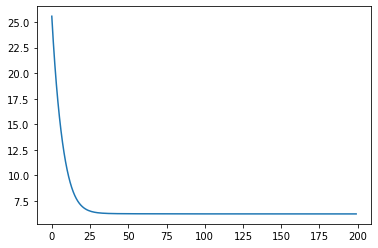

Fold 2


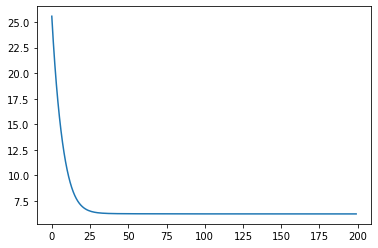

Fold 3


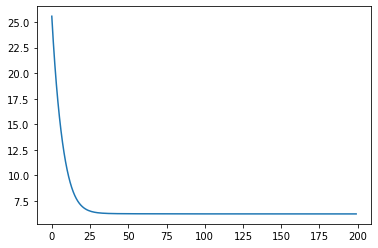

Fold 4


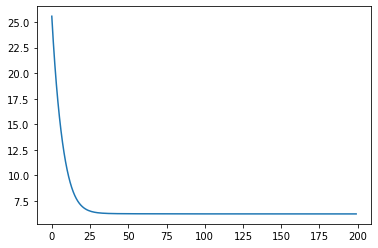

Fold 5


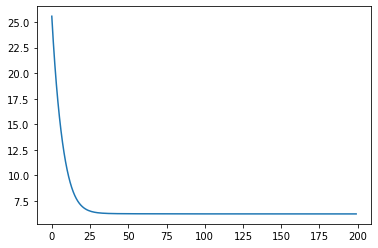

mean RMSES of test set [20.242244073272886, 20.82710329612155, 19.677156496935172, 20.24340829179446, 19.489022864041235]
mean RMSES of train set [20.151101833906797, 20.003357398919704, 20.304146620826003, 19.766792138042312, 20.251560087450294]
K-value - : 20.09578700443306


In [215]:
# Applying Kfold on whold data set
a, b = KFold(5 , X ,Y , 0.1 , 200)

# **Part c**

In [24]:
class Ridge_Linear_Regression:
    w0=None
    w1=None
    learning_rate=None
    itrs=None
    features=None
    train_set_size=None
    lamda = None

    def __init__(self, learning_rate, itrs, features, training_points , lamda):
        self.w1 = np.zeros(features , dtype=float)
        self.w0 =  0.
        self.learning_rate=learning_rate
        self.itrs = itrs
        self.features = features
        self.training_points = training_points
        self.lamda = lamda

    def compute_cost(self ,  X, Y, w1, w0): 
      m = X.shape[0]
      cost = 0.0
      for i in range(m):                                
          f_w_x = np.dot(X[i], w1) + w0          
          cost = cost + (f_w_x - Y[i])**2       
      cost = cost / (2 * m) 

      reglar_cost = 0       
      for j in range(self.features):
        reglar_cost += (self.w1[j]**2)                         
      reglar_cost = (self.lamda/(2*m)) * reglar_cost 

      Total = cost + reglar_cost
      return Total
    

    def defferential_equation(self ,  X, Y , w1 , w0):
      m,n = X.shape           
      dj_dw1 = np.zeros((n,))
      dj_dw0 = 0.

      for i in range(m):                             
          err = (np.dot(X[i], w1) + w0) - Y[i]   
          for j in range(n):                         
              dj_dw1[j] = dj_dw1[j] + (err * X[i, j])   
          dj_dw0 = dj_dw0 + err                        
      dj_dw1 = dj_dw1 / m                                
      dj_dw0 = dj_dw0 / m   

      for j in range(n):
        dj_dw1[j] = dj_dw1[j] + (self.lamda/m) * w1[j]

      return dj_dw0, dj_dw1


    def gradient_descent(self , X, Y):     
      J_history = []
      w1_dash = copy.deepcopy(self.w1)  
      w0_dash = self.w0
      
      for i in range(self.itrs):

          dj_dw0 , dj_dw1 = self.defferential_equation(X, Y, w1_dash, w0_dash) 

          w1_dash = w1_dash - self.learning_rate * dj_dw1             
          w0_dash = w0_dash - self.learning_rate * dj_dw0              
        
          if i<100000:       
              J_history.append( self.compute_cost(X, Y, w1_dash, w0_dash))

          # if i% math.ceil(self.itrs / 10) == 0:
          #     print(f'Iteration {i}: Cost {J_history[-1]}'  )
          
      return w1_dash, w0_dash, J_history 
    
    def predict(self, x):
        return (np.matmul(x,self.w1)+self.w0)

In [ ]:
class Lasso_Linear_Regression:
    w0=None
    w1=None
    learning_rate=None
    itrs=None
    features=None
    train_set_size=None
    lamda = None

    def __init__(self, learning_rate, itrs, features, training_points , lamda):
        self.w1 = np.zeros(features , dtype=float)
        self.w0 =  0.
        self.learning_rate=learning_rate
        self.itrs = itrs
        self.features = features
        self.training_points = training_points
        self.lamda = lamda

    def compute_cost(self ,  X, Y, w1, w0): 
      m = X.shape[0]
      cost = 0.0
      for i in range(m):                                
          f_w_x = np.dot(X[i], w1) + w0          
          cost = cost + (f_w_x - Y[i])**2       
      cost = cost / (2 * m) 

      reglar_cost = 0       
      for j in range(self.features):
        reglar_cost += abs(self.w1[j])                         
      reglar_cost = (self.lamda/(2*m)) * reglar_cost 

      Total = cost + reglar_cost
      return Total
    

    def defferential_equation(self ,  X, Y , w1 , w0):
      m,n = X.shape           
      dj_dw1 = np.zeros((n,))
      dj_dw0 = 0.

      for i in range(m):                             
          err = (np.dot(X[i], w1) + w0) - Y[i]   
          for j in range(n):                         
              dj_dw1[j] = dj_dw1[j] + (err * X[i, j])   
          dj_dw0 = dj_dw0 + err                        
      dj_dw1 = dj_dw1 / m                                
      dj_dw0 = dj_dw0 / m   

      for j in range(n):
        dj_dw1[j] = dj_dw1[j] + (self.lamda/m) * w1[j]

      return dj_dw0, dj_dw1


    def gradient_descent(self , X, Y):     
      J_history = []
      w1_dash = copy.deepcopy(self.w1)  
      w0_dash = self.w0
      
      for i in range(self.itrs):

          dj_dw0 , dj_dw1 = self.defferential_equation(X, Y, w1_dash, w0_dash) 

          w1_dash = w1_dash - self.learning_rate * dj_dw1             
          w0_dash = w0_dash - self.learning_rate * dj_dw0              
        
          if i<100000:       
              J_history.append( self.compute_cost(X, Y, w1_dash, w0_dash))

          # if i% math.ceil(self.itrs / 10) == 0:
          #     print(f'Iteration {i}: Cost {J_history[-1]}'  )
          
      return w1_dash, w0_dash, J_history 
    
    def predict(self, x):
        return (np.matmul(x,self.w1)+self.w0)

In [124]:
lg2 = Linear_Regression(0.3 , 200 , X_train.shape[1] ,X_train.shape[1])
a , b , c = lg2.gradient_descent(X_train,y_train)
print(a,b)

[ 1.63786822 -3.07858276 -7.17416426  2.82143872  1.87330948 -0.72053751] [38.21840726]


In [126]:
lg2 = Ridge_Linear_Regression(0.3 , 200 , X_train.shape[1] ,X_train.shape[1] , 0.5)
a , b , c = lg2.gradient_descent(X_train,y_train)
print(a,b)

[ 1.63350671 -3.07419782 -7.13381114  2.82549795  1.88168759 -0.69305008] [38.21825711]


In [129]:
print("K = 2")
KFold(2 ,X , Y , lg2)
print("K = 3")
KFold(3 ,X , Y  , lg2)
print("K = 4")
KFold(4 ,X , Y  , lg2)
print("K = 5")
KFold(5 ,X , Y  , lg2)

K = 2
ERROR: [20.27243047091462, 20.06541205332114]
mean error: 20.16892126211788
K = 3
ERROR: [20.641793119504076, 19.980349494992048, 19.87687872808542]
mean error: 20.16634044752718
K = 4
ERROR: [20.388046778843496, 20.138555255206125, 20.187922348222564, 19.74073581418476]
mean error: 20.113815049114237
K = 5
ERROR: [20.242244073272886, 20.82710329612155, 19.677156496935172, 20.24340829179446, 19.489022864041235]
mean error: 20.09578700443306


In [120]:
KFold2(3 ,X_train ,y_train , lg2)

ERROR: [20.91126708043037, 20.39975434344069, 19.4231428268632]
mean error: 20.24472141691142


# **Part d** - Normalizarion

In [287]:
X1 = df.iloc[:,0:6]
X1['b'] = 1
# # X1
# sc_x = StandardScaler()
# X1 = sc_x.fit_transform(X1)
X1 = X1.to_numpy()

In [293]:
def KFold_normal(k , x , y):
    ERROR = []
    sz = len(x)//k
    for i in range(k):    
        x_test = x[i*sz:(i+1)*sz] 
        y_test = y[i*sz :(i+1)*sz]
        if i>0:            
            if i==k-1:
                x_train=x[:i*sz]  
                y_train=y[:i*sz]
            else:
                p = x[(i-1)* sz : i * sz]
                n = x[(i+1)* sz:]
                x_train=np.concatenate((p,n))
                p = y[(i-1)* sz : i * sz]
                n = y[(i+1)* sz : ]
                y_train=np.concatenate((p,n))
        else:
            x_train = x[(i+1) * sz:]
            y_train = y[(i+1) * sz:]    

        print("Fold " , (i+1))
        A = np.matmul(np.transpose(x_train),x_train)
        B = np.linalg.inv(A)
        C = np.matmul(B,np.transpose(x_train))
        D = np.matmul(C, y_train)
        print(np.transpose(D))
        y_pred = np.matmul(x_test,D)
        ERROR.append(RMSE(y_pred,y_test))
    # print(ERROR)
    print("mean RMSES of K-values",ERROR)
    print("K-value - :" , np.sum(ERROR)/k)

In [294]:
KFold_normal(5, X1 ,Y )

Fold  1
[[ 4.22748079e+00 -2.52231249e-01 -4.56066471e-03  1.13742119e+00
   2.26828538e+02 -2.32023441e+01 -1.13117352e+04]]
Fold  2
[[ 6.19565718e+00 -2.72360622e-01 -4.65230938e-03  1.10847915e+00
   2.23354713e+02 -1.88613682e+01 -1.57143516e+04]]
Fold  3
[[ 4.84336437e+00 -2.44465133e-01 -4.93551867e-03  1.09671859e+00
   2.14033290e+02 -4.03799810e+01 -1.01439745e+04]]
Fold  4
[[ 3.99677324e+00 -2.48750348e-01 -4.38792333e-03  1.17353740e+00
   2.03545615e+02  3.71908504e+00 -1.35383268e+04]]
Fold  5
[[ 5.02868007e+00 -2.82772088e-01 -4.30915618e-03  1.14861900e+00
   2.46620489e+02 -1.50091639e+01 -1.44142268e+04]]
mean RMSES of K-values [3.5505309245897005, 4.6698340489655825, 3.818361445656099, 5.801790998882705, 3.897722675056276]
K-value - : 4.347648018630073


In [273]:
A = np.matmul(np.transpose(X),X)
B = np.linalg.inv(A)
C = np.matmul(B,np.transpose(X))
D = np.matmul(C, Y)
print(D)

[[ 1.449314  ]
 [-3.06878822]
 [-5.65682337]
 [ 3.33410316]
 [ 2.79478248]
 [-0.19043687]]


In [222]:
A = np.matmul(np.transpose(X),X)
B = np.linalg.inv(A)
C = np.matmul(B,np.transpose(X))
D = np.matmul(C, Y)


array([[ 1.449314  ],
       [-3.06878822],
       [-5.65682337],
       [ 3.33410316],
       [ 2.79478248],
       [-0.19043687]])